### 导入必要的库 数据预处理

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# 重新调整所有图像的大小
IMAGE_SIZE = [224, 224]

train_path = r'data/train'
valid_path = r'data/test'

# 在VGG前端添加预处理层
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# 不需要训练现有的权重
for layer in vgg.layers:
  layer.trainable = False
  

In [2]:
# 图层 需要的话可以添加
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# 创建一个模型对象
#使用的是VGG16卷积网络模型
model = Model(inputs=vgg.input, outputs=prediction)

# 查看模型结构
model.summary()

# 模型优化方法
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [4]:
# 调用API  fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\PC_SKY_WYT\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/5
625/625 [==============================] - 303s 451ms/step - loss: 0.3301 - accuracy: 0.8554 - val_loss: 0.2292 - val_accuracy: 0.9144
Epoch 2/5
625/625 [==============================] - 410s 656ms/step - loss: 0.2255 - accuracy: 0.9131 - val_loss: 0.2050 - val_accuracy: 0.9254
Epoch 3/5
625/625 [==============================] - 302s 482ms/step - loss: 0.1768 - accuracy: 0.9346 - val_loss: 0.2030 - val_accuracy: 0.9298
Epoch 4/5
625/625 [==============================] - 382s 611ms/step - loss: 0.2006 - accuracy: 0.9309 - val_loss: 0.2351 - val_accuracy: 0.9236
Epoch 5/5
625/625 [==============================] - 533s 852ms/step - loss: 0.1883 - accuracy

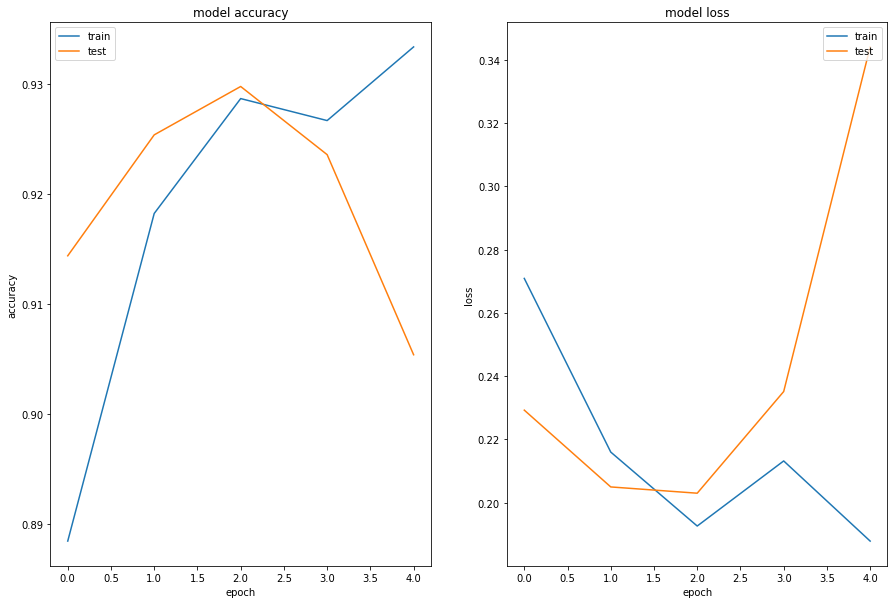

In [5]:
# 绘制训练时准确率、损失率图
history=r
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [10]:
import tensorflow as tf
from keras.models import load_model

In [11]:
#保存模型
model.save("Cats_Dogs_model.h5")

In [12]:
#读取模型
#编译模型
model = load_model("Cats_Dogs_model.h5")
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
'''=================================================================================================
                            Loading the model and Predicting the output'''

'=================================================================================================\n                            Loading the model and Predicting the output'

In [18]:
#对猫狗图像进行分类
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image

image_path = "10688.jpg"
#image_path = "11908.jpg"

img = image.load_img( image_path , target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [19]:
#预测
predict = model.predict([img])

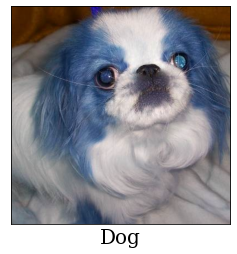

In [20]:
#得出猫狗分类的结果

img1 = cv2.imread("10688.jpg")
#img1 = cv2.imread("11908.jpg")
plt.imshow(img1)

plt.xticks([])
plt.yticks([])



font = {'family': 'serif',
        'color':  'BLACK',
        'weight': 'medium',
        'size': 20,
        }
if predict[0][0] == 1 :
  plt.xlabel("Cat" , fontdict = font)

if predict[0][1] == 1 :
  plt.xlabel("Dog" , fontdict = font) 


plt.show()